In [139]:
import pickle as p
import numpy as np
import tensorflow as tf
import random
import gensim
import lab1_utils as utils

%load_ext autoreload
%autoreload 2
import tensorflow as tf
session = tf.InteractiveSession()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Intro to TensorFlow

## What is a Computation Graph?

Everything in TensorFlow comes down to building a computation graph. What is a computation graph? Its just a series of math operations that occur in some order. Here is an example of a simple computation graph:

<img src="files/computation-graph.png">

This graph takes 2 inputs, (a, b) and computes an output (e). Each node in the graph is an operation that takes some input, does some computation, and passes its output to another node.

We could make this computation graph in TensorFlow in the following way:

In [2]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.add(a, b)
d = tf.sub(b, 1)
e = tf.mul(c, d)

Tensorflow uses tf.placeholder to handle inputs to the model. This is like making a reservation at a restaurant. The restaurant reserves a spot for 5 people, but you are free to fill those seats with any set of friends you want to. tf.placeholder lets you specify that some input will be coming in, of some shape and some type. Only when you run the computation graph do you actually provide the values of this input data. You would run this simple computation graph like this:

In [3]:
with tf.Session() as session:
    a_data, b_data = 3.0, 6.0
    feed_dict = {a: a_data, b:b_data}
    output = session.run([e], feed_dict=feed_dict)
    print(output) # 45.0

[45.0]


We use feed_dict to pass in the actual input data into the graph. We use session.run to get the output from the c operation in the graph. Since e is at the end of the graph, this ends up running the entire graph and returning the number 45 - cool!

## Neural Networks in Tensorflow

We can define neural networks in TensorFlow using computation graphs. Here is an example, very simple neural network (just 1 perceptron):

<img src="files/computation-graph-2.png">

This graph takes an input, (x) and computes an output (out). It does it with what we learned in class, `out = sigmoid(W*x+b)`.

We could make this computation graph in TensorFlow in the following way:

In [200]:
n_input_nodes = 2
n_output_nodes = 1
x = tf.placeholder(tf.float32, (None, n_input_nodes))
W = tf.Variable(tf.ones((n_input_nodes, n_output_nodes)), dtype=tf.float32)
b = tf.Variable(tf.zeros(n_output_nodes), dtype=tf.float32)
z = tf.matmul(x, W) + b
out = tf.sigmoid(z)

To run this graph, we again use session.run() and feed in our input via feed_dict.

In [202]:
test_input = [[0.5, 0.5]]
with tf.Session() as session:
    tf.global_variables_initializer().run(session=session)
    feed_dict = {x: test_input}
    output = session.run([out], feed_dict=feed_dict)
    print(output[0]) # 0.73105

[[ 0.7310586]]


We can also set the value of a tf.Variable when we make it. Below is an example where we set the value of tf.Variable ourselves. We've made a classification dataset for you to play around with, and see how the decision boundary changes with the model parameters (weights and bias).

(1, 1)
0.24973988533
('ec', 0, 1)
('ec2', 0, 1)
False
(1, 1)
0.268941432238
('ec', 0, 1)
('ec2', 0, 1)
False
(1, 1)
0.5
('ec', 0, 0)
('ec2', 0, 0)
True
(1, 1)
0.310025513172
('ec', 0, 0)
('ec2', 0, 0)
True
(1, 1)
0.377540677786
('ec', 0, 0)
('ec2', 0, 0)
True
(1, 1)
0.24973988533
('ec', 0, 1)
('ec2', 0, 1)
False
(1, 1)
0.24973988533
('ec', 0, 1)
('ec2', 0, 1)
False
(1, 1)
0.167981624603
('ec', 0, 1)
('ec2', 0, 1)
False
(1, 1)
0.231475219131
('ec', 0, 1)
('ec2', 0, 1)
False
(1, 1)
0.289050489664
('ec', 0, 0)
('ec2', 0, 0)
True
(1, 1)
0.475020796061
('ec', 0, 0)
('ec2', 0, 0)
True


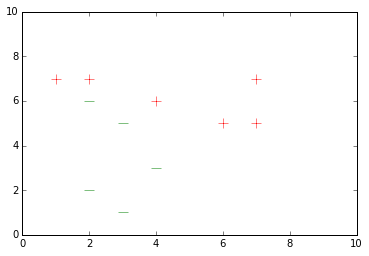

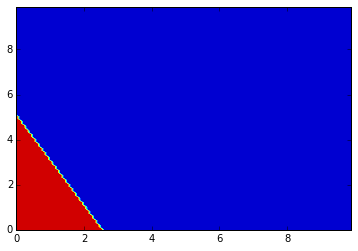

('predictions', [array([[ 0.24973989]], dtype=float32), array([[ 0.26894143]], dtype=float32), array([[ 0.5]], dtype=float32), array([[ 0.31002551]], dtype=float32), array([[ 0.37754068]], dtype=float32), array([[ 0.24973989]], dtype=float32), array([[ 0.24973989]], dtype=float32), array([[ 0.16798162]], dtype=float32), array([[ 0.23147522]], dtype=float32), array([[ 0.28905049]], dtype=float32), array([[ 0.4750208]], dtype=float32)])


In [280]:
# Modify weight_values, bias_value in the above code to adjust the decision boundary
# See if you can classify all the points correctly (all markers green)

# TODO - manually optimize weight_values and bias_value to classify points

weight_values = np.array([[-0.1], [-0.2]]) # TODO change values and re-run
bias_value = np.array([[0.5]]) #TODO change values and re-run

# A pretty good boundary is made with:
# weight_values = np.array([[0.03], [0.12]])
# bias_value = np.array([[-0.5]])

x = tf.placeholder(tf.float32, (None, 2), name='x')
W = tf.Variable(weight_values, name='W', dtype=tf.float32)
b = tf.Variable(bias_value, name='b', dtype=tf.float32)
z = tf.matmul(x, W) + b
out = tf.sigmoid(z)

data = np.array([[2, 7], [1, 7], [3, 1], [3, 5], [4, 3], [4, 6], [6, 5], [7, 7], [7, 5], [2, 6], [2, 2]])
labels = np.array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0])
labels_one_hot = np.array([utils.one_hot(l, 2) for l in labels])
with tf.Session() as session:
    tf.global_variables_initializer().run(session=session)
    utils.classify_and_plot(data, labels, x, out, session)

## Learning Weights with Gradient Descent
Now, that may have been a bit tedious. Do you appreciate the value of Gradient Descent now? No? Let's see how much easier things are with GradientDescent.

### Loss Function
Our

[1 1 0 0 0 1 1 1 1 0 0]
0.314867
0.296028
0.28
0.26796
0.259922
0.255032
0.252234
0.250686
0.249842
0.249383
0.249133
0.248994
0.248915
0.248869
0.24884
0.24882
0.248806
0.248795
0.248786
0.248778
0.24877
0.248764
0.248757
0.248751
0.248745
0.248739
0.248733
0.248728
0.248723
0.248718
0.248713
0.248709
0.248704
0.2487
0.248696
0.248692
0.248688
0.248685
0.248681
0.248678
0.248674
0.248671
0.248668
0.248665
0.248662
0.248659
0.248657
0.248654
0.248651
0.248649
0.248647
0.248644
0.248642
0.24864
0.248638
0.248636
0.248634
0.248632
0.24863
0.248628
0.248626
0.248624
0.248623
0.248621
0.248619
0.248618
0.248616
0.248615
0.248613
0.248612
0.24861
0.248609
0.248608
0.248606
0.248605
0.248604
0.248602
0.248601
0.2486
0.248599
0.248598
0.248596
0.248595
0.248594
0.248593
0.248592
0.248591
0.24859
0.248589
0.248588
0.248587
0.248586
0.248585
0.248584
0.248583
0.248582
0.248581
0.24858
0.248579
0.248578
0.248577
0.248576
0.248575
0.248574
0.248573
0.248573
0.248572
0.248571
0.24857
0.248569
0.24

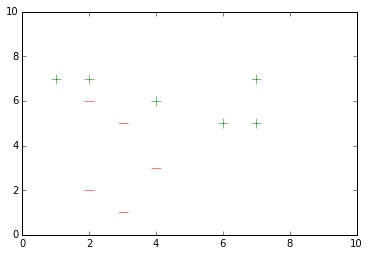

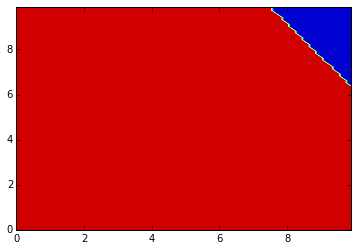

('predictions', [array([[ 0.54488987]], dtype=float32), array([[ 0.55009162]], dtype=float32), array([[ 0.58510566]], dtype=float32), array([[ 0.55493265]], dtype=float32), array([[ 0.5649308]], dtype=float32), array([[ 0.54210943]], dtype=float32), array([[ 0.53932643]], dtype=float32), array([[ 0.51875645]], dtype=float32), array([[ 0.5341056]], dtype=float32), array([[ 0.55251336]], dtype=float32), array([[ 0.58272702]], dtype=float32)])


In [287]:
# Define Loss Function + Optimizer

labels_placeholder = tf.placeholder(tf.float32, (None), name='labels')
loss = tf.reduce_mean(
    tf.pow((out-labels_placeholder), 2.0), name='loss')
learning_rate = 0.05
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
with tf.Session() as session:
    tf.global_variables_initializer().run(session=session)
#     labels = [1 for l in labels]
    print(labels)
    for i in range(500):
        _, loss_value, output = session.run(
          [optimizer, loss, out], feed_dict={x:data, labels_placeholder: labels})
        print(loss_value)
#         print(output)
        
    utils.classify_and_plot(data, labels, x, out, session)

In [ ]:
x = tf.placeholder(tf.float32, (None, 2), name='x')
W = tf.Variable(tf.ones((n_input_nodes, n_output_nodes)), dtype=tf.float32)
b = tf.Variable(tf.zeros(n_output_nodes), dtype=tf.float32)
z = tf.matmul(x, W) + b
out = tf.sigmoid(z)

labels_placeholder = tf.placeholder(tf.float32, (None), name='labels')
loss = tf.reduce_mean(
    tf.pow((out-labels_placeholder), 2.0), name='loss')
learning_rate = 0.05
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
with tf.Session() as session:
    tf.global_variables_initializer().run(session=session)
#     labels = [1 for l in labels]
    print(labels)
    for i in range(500):
        _, loss_value, output = session.run(
          [optimizer, loss, out], feed_dict={x:data, labels_placeholder: labels})
        print(loss_value)
#         print(output)
        
    utils.classify_and_plot(data, labels, x, out, session)

Let's move to a real-world task. We're going to be classifying tweets as positive, negative, or neutral. Check out the very negative tweet below:

<img src="files/tweet-model.jpg">

## Building the Model

In this model, we’ll be representing tweets as [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model) (BOW) representations. BOW representations are vectors where each element index represents a different word and its value represents the number of times this word appears in our sentence. This means that each sentence will be represented by a vector that is vocab_size long. Our output labels will be represented as a vector of size n_classes (3). We get this data with some utility functions:

In [13]:
X, y, index_to_word, sentences = utils.load_sentiment_data_bow()
X_train, y_train, X_test, y_test = utils.split_data(X, y)
vocab_size = X.shape[1]
n_classes = y.shape[1]

print("Tweet:", sentences[5])
print("Label:", y[5])
print("Bag of Words Representation:", X_train[5].tolist())

('Tweet:', "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA")
('Label:', array([ 0.,  0.,  1.]))
('Bag of Words representation:', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

So we have our data loaded as numpy arrays. But remember, TensorFlow graphs begin with generic placeholder inputs, not actual data. We feed the actual data in later once the full graph has been defined. We define our placeholders like this:

In [14]:
data_placeholder = tf.placeholder(tf.float32, shape=(None, vocab_size), name='data_placeholder')
labels_placeholder = tf.placeholder(tf.float32, shape=(None, n_classes), name='labels_placeholder')

## Why Do We Pass in None?

A note about ‘None’ and fluid-sized dimensions:

You may notice that the first dimension of shape of data_placeholder is ‘None’. data_placeholder should have shape (num_tweets, vocab_size). However, we don’t know how many tweets we are going to be passing in at a time, num_tweets is unknown. Its possible that we only want to pass in 1 tweet at a time, or 30, or 1,000. Thankfully, TensorFlow allows us to specify placeholders with fluid-sized dimensions. We can use None to specify some fluid dimension of our shape. When our data eventually gets passed in as a numpy array, TensorFlow can figure out what the value of the fluid-size dimension should be.

## Network Parameters
Let’s now define and initialize our network parameters:

In [ ]:
# Define Network Parameters
n_hidden_units_h0 = 512
n_hidden_units_h1 = 256

h0_weights = tf.Variable(
    tf.truncated_normal([vocab_size, n_hidden_units_h0]),
    name='h0_weights')
h0_biases = tf.Variable(tf.zeros([n_hidden_units_h0]),
                     name='h0_biases')

h1_weights = tf.Variable(
    tf.truncated_normal([n_hidden_units_h0, n_hidden_units_h1]),
    name='h1_weights')
h1_biases = tf.Variable(tf.zeros([n_hidden_units_h1]),
                     name='h1_biases')

h2_weights = tf.Variable(
    tf.truncated_normal([n_hidden_units_h1, n_classes]),
    name='h2_weights')
h2_biases = tf.Variable(tf.zeros([n_classes]),
                     name='h2_biases')

We have defined our model parameters using tf.Variable. When you create a tf.Variable you pass a Tensor as its initial value to the Variable() constructor. A Tensor is a term for any N-dimensional matrix. There are a ton of different initial Tensor value functions you can use (full list). All these functions take a list argument that determines their shape. Here we use tf.truncated_normal for our weights, and tf.zeros for our biases. Its important that the shape of these parameters are compatible. We’ll be matrix-multiplying the weights, so the last dimension of the previous weight must equal the first dimension of the next weight. Notice this pattern in the Tensor initialization code. Lastly, notice the size of the Tensor for our last weights. We are predicting a vector of size n_classes so our network needs to end with n_classes nodes.

## Computation Graph

Now let’s define our computation graph

In [ ]:
# Define Computation Graphs
hidden0 = tf.nn.relu(tf.matmul(data_placeholder, h0_weights) + h0_biases)
hidden1 = tf.nn.relu(tf.matmul(hidden0, h1_weights) + h1_biases)
logits = tf.matmul(hidden1, h2_weights) + h2_biases

# NLP Lab, Part I

Welcome to the first lab of 6.S191!

### Administrivia
Things to install:
- [tensorflow](https://www.tensorflow.org/get_started/os_setup)
- [word2vec](https://github.com/danielfrg/word2vec)

### Lab Objectives:
-  Learn Machine Learning methodology basics (train/dev/test sets)
-  Learn some Natural Language Processing basics (word embeddings with word2vec) 
-  Learn the basics of tensorflow, build your first deep neural nets (MLP, RNN) and get results!



And we'll be doing all of this in the context of Twitter sentiment analysis. Given a tweet like:
```
omg 6.S196 is so cool #deeplearning #mit
```
We want an algorithm to label this tweet as positive or negative. It's intractable to try to solve this task via some lexical rules, so instead, we're going to use deep learning to embed these tweets into some deep latent space where distinguishing between the two is realtively simple.

## Machine Learning Basics
Given some dataset with tweets $X$, and sentiments $Y$, we want to learn a function $f$, such that $Y = f(X)$.
In our context, $f$ is deep neural network parameterized by some network weights $\Theta$, and  we're going to do our learning via gradient descent. 

### Objective Function
To start, we need someway to measure how good our $f$ is, so we can take a gradient in respective to that performance and move in the right direction. We call this performance evaluation our Loss function, L , and this is something we want to minimize. 

Since we are doing classification (pos vs neg), a common loss function  to use is cross entropy.

$$L( \Theta ) = - \Sigma_i ( f(x_i)*log(y_i) + (1-f(x_i))log(1-y_i) ) $$ 

where $f(x)$ is the probablity a tweet $x$ is positive (which we want to be 1 if it's postive and 0 if it's negative) and $y$ is the correct answer. We can access this function in tensorflow with `tf.nn.sigmoid_cross_entropy_with_logits`, which will come handy in code. Given that $f$ is parameterized by $\Theta$, we can take the gradient $\frac{dL}{d\Theta}$, and we learn by updating our parameters to minimize the loss.

Note that this loss is 0 if the prediction is correct, and very large if we predict something has 0 probablity of being positive when it is in fact positive.


### Methodology
To measure how well we're doing, we can't just look at how well our model performs on it's training data. It could be just memorizing the training data and perform terribly on data it hasn't seen before. To really measure how $f$ performs in the wild, we need to present it with unseen data, and we can tune our hyper-parameters (like learning rate, num layers etc.) over this first unseen set, which we call our development (or validation) set. However, given that we optimized our hyper-parameters to the development set, to get a true fair assesment of the model, we test it in respect to a held-out test set at the end, and generaly report those numbers.

In summary:
Namely, we training on one set, i.e. a training set,
evaluate and tune our hyper paremeters in regards to our performance on the dev set,
and report finals results on a completely heldout test set. 

Let's load these now. This ratio of sizes (6:2:2) is fairly standard.



In [23]:
trainSet = p.load( open('data/train.p','rb'))
devSet = p.load( open('data/dev.p','rb'))
testSet = p.load( open('data/test.p','rb'))

## Let's look at the size of what we have here. Note, we could use a much larger train set, 
## but we keep it mid-size so you can run this whole thing off your laptop.
len(trainSet), len(devSet), len(testSet)


(60000, 20000, 20000)

## NLP Basics
The first question we need to address is how do we represent a tweet? And how do we represent a word?
One way to do this is with one hot vectors for each word, where a given word $w_i= [0,0,...,1,..0]$.  Each "slot" in this vector represents a word, and wherever the value 1 is tells us which word we are representing.

However, in this representation, words like "love" and "adore" are as similar as "love" and "hate", because the cosine similarity is 0 in both cases (the vectors for different words are all 1 in a different dimension, making them all orthogonal to each other).  Another issue is that these vectors are huge in order to represent the whole vocab. To get around this issue, the NLP community developed a techique called Word Embeddings. 

## Word2Vec

The basic idea is we represent a word with a vector $\phi$ by the context the word appears in. We do this by training a neural network to predict the context of words across a large training set. The weights of that neural network can then be thought of as a dense and useful representation that captures context. This is useful because now our representations of words captures actual semantic similarity.

Word Embeddings capture all kinds of useful semantic relationships. For example, one cool emergent property is $ \phi(king) - \phi(queen) = \phi(man) - \phi(woman)$. To learn more about the magic behind word embeddings we recommend Chris Olah's [blog post](https://colah.github.io/posts/2014-07-NLP-RNNs-Representations/). A common tool for generating Word Embeddings is word2vec, which is what we'll be using today.

In [26]:
## Note: these tweets were preprocessed to remove non-alphanumeric chars, 
## replace unfrequent words, and padded to be same length.
## We're going to train our embeddings on only our train set 
## in order to evaluate our dev/test tests fairly.
trainSentences = [" ".join(tweetPair[0]) for tweetPair in trainSet]
print "An example train sentence: ", trainSentences[0]
trainSentences_in_array_format = [sentence.split(" ") for sentence in trainSentences]
## We'll save our train sentences.
print(trainSentences_in_array_format[0])
p.dump(trainSentences, open('data/trainSentences.p','wb'))

## To create a model, the word2vec module expects a file containing a list of strings, 
## a target to store the model, and then the size of the embedding vector.
## Here, we train a word2vec model and generate a text8.bin file containing 
## the word vectors in a binary format, saved in data/embeddings.bin.
embedding_vector_size = 100
# word2vec.word2vec('data/trainSentences.p','data/emeddings.bin', embedding_vector_size, verbose=True)
w2vModel = gensim.models.Word2Vec(trainSentences_in_array_format, size=embedding_vector_size, window=5, min_count=5, workers=4)
## We load the model we just made.
# w2vModel = gensim.Word2Vec.load_word2vec_format('data/emeddings.bin')
print "word2vec model vocabulary: ", w2vModel.vocab

An example train sentence:  finally back twitterberry messed up my phone lets try this one out padtoken padtoken padtoken padtoken padtoken padtoken padtoken padtoken
['finally', 'back', 'twitterberry', 'messed', 'up', 'my', 'phone', 'lets', 'try', 'this', 'one', 'out', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken']
word2vec model vocabulary:  {'raining': <gensim.models.word2vec.Vocab object at 0x10c0d7190>, 'yellow': <gensim.models.word2vec.Vocab object at 0x1023b78d0>, 'four': <gensim.models.word2vec.Vocab object at 0x115a10450>, 'woods': <gensim.models.word2vec.Vocab object at 0x115a10d10>, 'spiders': <gensim.models.word2vec.Vocab object at 0x115a10490>, 'hanging': <gensim.models.word2vec.Vocab object at 0x115a10390>, 'looking': <gensim.models.word2vec.Vocab object at 0x115a103d0>, 'eligible': <gensim.models.word2vec.Vocab object at 0x115a10350>, 'snowing': <gensim.models.word2vec.Vocab object at 0x115a10310>, 'lord': <gensim.models.w

In [25]:
## Each word is a 100 dimension vector like this
print "embedding for the word 'good': ", w2vModel['good']

embedding for the word 'fun':  [-0.00930107 -0.37876061  0.28631237 -0.27655831 -0.40339515 -0.1355148
  0.08625538  0.15000021  0.01108676 -0.15995295 -0.08191522 -0.06884448
 -0.15876956  0.10637461 -0.32012475 -0.12016807 -0.12968828  0.16135299
  0.28448913 -0.08024191  0.49389264  0.12243376  0.23509948  0.02137404
 -0.05436419 -0.00457596 -0.09980784  0.06218928 -0.47685012 -0.16016147
  0.07640646  0.26604989 -0.00930843 -0.0725003  -0.18393558  0.15949646
 -0.01023937  0.29060042 -0.39026219  0.27950871  0.02046356 -0.10959776
 -0.08554171 -0.09985737 -0.12364832 -0.26631677  0.05994165  0.10851523
 -0.0938706   0.23059595 -0.17180063  0.2185846  -0.16276227 -0.05704703
  0.33597794 -0.18208523  0.22100393 -0.05469242  0.11968235  0.21984586
  0.20236519 -0.10173579 -0.03274078  0.18230143 -0.12575294  0.2090705
 -0.15963048 -0.23170279  0.26390263  0.33680245 -0.16353761  0.14590007
  0.15539671 -0.05013485  0.05775106 -0.06950701 -0.21758053 -0.04916734
 -0.11578354  0.024632

Now lets look at the words most similar to the word "good".

In [28]:
# Since we have words represented in vector space, we can find similiar words
# We can use cosine_similarity to find the most similiar words
# This method returns: (similiar word, cosine similarity of the 2 vectors)
most_similiar = w2vModel.most_similar(positive=['good'])
print "Similar words to 'good': ", most_similiar

Similar words to 'good':  [('great', 0.7146942615509033), ('nice', 0.6608302593231201), ('bad', 0.579961895942688), ('rainin', 0.5156221985816956), ('long', 0.4963721036911011), ('this', 0.49461567401885986), ('bellybuttons', 0.47974175214767456), ('beautiful', 0.4766841232776642), ('awesome', 0.46822673082351685), ('lovely', 0.4634754955768585)]


In [39]:
# We can also use this vector representation to do things like outlier detection
odd_one_out = w2vModel.doesnt_match(['fork', 'spoon', 'knife', 'fire'])
print "Odd word out:", odd_one_out

Odd word out: fire


In [ ]:
# Lastly, we can also use these useful vector representation to
# compute analogies


In [18]:
## Define our word embeddings for use later on.
# word_embeddings = w2vModel.vectors
vocab = w2vModel.index2word
word_embeddings = np.array([w2vModel[word] for word in vocab])

## 
word_embeddings[1] = np.zeros([100,])
vocab_size = len(w2vModel.vocab)

In [19]:
word_embeddings.shape

(7014, 100)

Feel free to play around here test the properties of your embeddings, how they cluster etc. In the interest of time, we're going to move on straight to models.
 
Now in order to use these embeddings, we have to represent each tweet as a list of indices into the embedding matrix.
This preprocessing code is available in processing.py if you are interested. 
 
## Tensorflow Basics
Tensorflow is a hugely popular library for building neural nets. The general workflow in building models in tensorflow is as follows:
- Specify a computation graph (The struture and computations of your neural net)
- Use your session to feed data into the graph and fetch things from the graph (like the loss, and train operation)
Inside the graph, we put our neural net, our loss function, and our optimizer and once this is constructed, we can feed in the data, fetch the loss and the train op to train it.

Here is a toy example putting 2 and 2 together, and initializing some random weight matrix. 

### Building an MLP

MLP or Multi-layer perceptron is a basic archetecture where where we multiply our representation with some matrix `W` and add some bias `b` and then apply some nonlineanity like `tanh` at each layer. Layers are fully connected to the next. As the network gets deeper, it's expressive power grows exponentially and so they can draw some pretty fancy decision boundaries. In this exercise, you'll build your own MLP, with 1 hidden layer (layer that isn't input or output), with 100 dimensions.

To make training more stable and efficient, we'll do this we'll actually evalaute 20 tweets at a time, and take gradients and respect to the loss on the 20. We call this idea training with mini-batches.
### Defining the Graph
#### Step 1: Placeholders, Variables with specified shapes
- Let start off with placeholders for our tweets, and lets use a minibatch of size 20.
Remember each tweet is will be represented as a vector of `sentence length` (20) word_ids , and since we are packing `mini-batch size` number of tweets in the graph a time tweets per iteration, we need a matrix of `minibatch * sentence length `. Feel free to check out the placeholder api [here](https://www.tensorflow.org/api_docs/python/io_ops/placeholders#placeholder)
- Set up a placeholder for your labels, namely the `mini-batch size` length vector of sentiments.
- Set up a placeholder for our pretrained word embeddings. This will take shape `vocab_size * embedding_size`
- Set up a variable for your weight matrix, and bias. Check out the variable api [here](https://www.tensorflow.org/api_docs/python/state_ops/variables) Let's use a hidden dimension size of 100 (so 100 neurons in the next layer) 
For the Weight matrix, use tf.random_normal_initializer(stddev=1.0 / hidden_dim_size), as this does something called symetry breaking and keeps the neural network from getting stuck at the start.
For the bias vector, use tf.constant_initializer(0)

- Set up loss function, and optimizer to minimize it. We'll be using Adam as our optimizer

In [21]:
## Make sure to call your output embedding logits, and your sentiments placeholder sentiments in python
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits, sentiments)
loss = tf.reduce_sum(loss)
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss)

NameError: name 'logits' is not defined

### Run the Graph
#### Step 3: Set up training, and fetch optimizer at each iteration to train the model
- First initialize all variables as in the toy example
- Sample 20 random tweet,sentiment pairs for our feed_dict dictionary. Remember to feed in the embedding matrix.
- fetch dictionary, the ops we want to run and tensors we want back
- Execute this many times to train

In [10]:
trainSet = p.load( open('data/trainTweets_preprocessed.p','rb'))
random.shuffle(trainSet)

" TODO Init vars"

losses = []
for i in range(5000):
    trainTweet = np.array(  [ t[0] for t in trainSet[i: i+ minibatch_size]])
    trainLabels = np.array( [int(t[1]) for t in trainSet[i: i+ minibatch_size] ])
    
    results = "TODO, run graph with data"
    losses.append(results['loss'])
    if i % 500 == 0:
        print("Iteration",i,"Loss", sum(losses[-500:-1])/500. if i > 0 else losses[-1])
    

NameError: name 'minibatch_size' is not defined

#### Step 4: Check validation results, and tune
- Try running the graph on validation data, without fetching the train op.
- See how the results compare. If the train loss is much lower than the development loss, we may be overfitting. If the train loss is still high, try experimenting with the model archetecture to increase it's capacity.

In [11]:
validationSet = p.load( open('data/devTweets_preprocessed.p','rb'))
random.shuffle(validationSet)

losses = []
for i in range(20000/20):
    valTweet = np.array(  [ t[0] for t in validationSet[i: i+ minibatch_size]])
    valLabels = np.array( [int(t[1]) for t in validationSet[i: i+ minibatch_size] ])

    results = "TODO" 
    losses.append(results['loss'])
print("Dev Loss", sum(losses)*1./len(losses))

NameError: name 'minibatch_size' is not defined

#### Future Steps:
Things to try on your own:
- Adding in a tensor for accuracy, and log it at each step.
- Iterate over whole validation dataset to get more stable validation score
- Try tensorboard and graphing accuracy over both sets time.
- experiment with different archetectures that maximize validation score. Maybe bag of words, which doesn't distinguish between "bad not good" and "good not bad" isn't a good enough representation. 
- test it on the test data
- Do the RNN tutorial!

# Solutions!
Do not look unless you really have to. Ask TA's for help first. Fight for the intuition, you'll get more out of it. 

In [7]:
# Step 1:
tf.reset_default_graph()
session = tf.Session()


minibatch_size = 20
tweet_length = 20
embedding_size = 100
hidden_dim_size = 100
output_size = 1
init_bias = 0

tweets          = tf.placeholder(tf.int32, shape=[minibatch_size,tweet_length])
sentiments      = tf.placeholder(tf.float32, shape=[minibatch_size])
embeddingMatrix = tf.placeholder(tf.float32, shape =[vocab_size, embedding_size] )
W_hidden = tf.get_variable("W_hidden", [embedding_size, hidden_dim_size], tf.float32, tf.random_normal_initializer(stddev=1.0 / hidden_dim_size))
b_hidden = tf.get_variable("b_hidden", [hidden_dim_size], initializer=tf.constant_initializer(init_bias))
W_output = tf.get_variable("W_output", [hidden_dim_size, output_size], tf.float32, tf.random_normal_initializer(stddev=1.0 / hidden_dim_size))
b_output = tf.get_variable("b_output", [output_size], initializer=tf.constant_initializer(init_bias))

# Step 2:
tweet_embedded =  tf.nn.embedding_lookup(embeddingMatrix, tweets)
averagedTweets = tf.reduce_mean(tweet_embedded, axis=1)
hidden_proj = tf.matmul( averagedTweets, W_hidden) + b_hidden
non_linearity = tf.nn.tanh(hidden_proj)
logits = tf.matmul( non_linearity,  W_output)+ b_output
logits = tf.reshape(logits, shape=[minibatch_size])

## Make sure to call your output embedding logits, and your sentiments placeholder sentiments in python
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits, sentiments)
loss = tf.reduce_sum(loss)
optimizer = tf.train.AdamOptimizer().minimize(loss)

# Step 3:
trainSet = p.load( open('data/trainTweets_preprocessed.p','rb'))
random.shuffle(trainSet)

tf.global_variables_initializer().run(session=session)

losses = []
for i in range(5000):
    trainTweet = np.array(  [ t[0] for t in trainSet[i: i+ minibatch_size]])
    trainLabels = np.array( [int(t[1]) for t in trainSet[i: i+ minibatch_size] ])
    
    feed_dict = {
        embeddingMatrix: word_embeddings,
        tweets: trainTweet,
        sentiments: trainLabels
    }
    fetch = {
        'loss': loss,
        'trainOp': optimizer
    }
    results = session.run(fetch, feed_dict=feed_dict)
    losses.append(results['loss'])
    if i % 500 == 0:
        print("Iteration",i,"Loss", sum(losses[-500:-1])/500. if i > 0 else losses[-1])
    

# Step 4:
validationSet = p.load( open('data/devTweets_preprocessed.p','rb'))
random.shuffle(validationSet)

losses = []
for i in range(20000/20):
    valTweet = np.array(  [ t[0] for t in validationSet[i: i+ minibatch_size]])
    valLabels = np.array( [int(t[1]) for t in validationSet[i: i+ minibatch_size] ])
    feed_dict = {
        embeddingMatrix: word_embeddings,
        tweets: valTweet,
        sentiments: valLabels
    }
    fetch = {
        'loss': loss,
    }
    results = session.run(fetch, feed_dict=feed_dict)
    losses.append(results['loss'])
print("Dev Loss", sum(losses)*1./len(losses))

('Iteration', 0, 'Loss', 13.863605)
('Iteration', 500, 'Loss', 13.386107885360717)
('Iteration', 1000, 'Loss', 12.725600246429444)
('Iteration', 1500, 'Loss', 11.904365862846374)
('Iteration', 2000, 'Loss', 12.305848783493042)
('Iteration', 2500, 'Loss', 12.296946668624878)
('Iteration', 3000, 'Loss', 12.073168117523194)
('Iteration', 3500, 'Loss', 12.817259819030761)
('Iteration', 4000, 'Loss', 11.274570767402649)
('Iteration', 4500, 'Loss', 12.339351572990417)
('Dev Loss', 13.010971076488495)


### Solutions

In [ ]:
import math
import cPickle as p
import tensorflow as tf
import numpy as np

#build RNN model
batch_size = 20
hidden_size = 100
vocab_size = 7597

tf.reset_default_graph()
session = tf.Session()

def lookup_table(input_, vocab_size, output_size, name):
    with tf.variable_scope(name):
        embedding = tf.get_variable("embedding", [vocab_size, output_size], tf.float32, tf.random_normal_initializer(stddev=1.0 / math.sqrt(output_size)))
    return tf.nn.embedding_lookup(embedding, input_)

def linear(input_, output_size, name, init_bias=0.0):
    shape = input_.get_shape().as_list()
    with tf.variable_scope(name):
        W = tf.get_variable("Matrix", [shape[-1], output_size], tf.float32, tf.random_normal_initializer(stddev=1.0 / math.sqrt(shape[-1])))
    if init_bias is None:
        return tf.matmul(input_, W)
    with tf.variable_scope(name):
        b = tf.get_variable("bias", [output_size], initializer=tf.constant_initializer(init_bias))
    return tf.matmul(input_, W) + b

tweets = tf.placeholder(tf.int32, [batch_size, None])
labels = tf.placeholder(tf.float32, [batch_size])

embedding = lookup_table(tweets, vocab_size, hidden_size, name="word_embedding")
lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(hidden_size)
init_state = lstm_cell.zero_state(batch_size, tf.float32)
_, final_state = tf.nn.dynamic_rnn(lstm_cell, embedding, initial_state=init_state)
sentiment = linear(final_state[1], 1, name="output")

sentiment = tf.squeeze(sentiment, [1])
loss = tf.nn.sigmoid_cross_entropy_with_logits(sentiment, labels)
loss = tf.reduce_mean(loss)
prediction = tf.to_float(tf.greater_equal(sentiment, 0.5))
pred_err = tf.to_float(tf.not_equal(prediction, labels))
pred_err = tf.reduce_sum(pred_err)

optimizer = tf.train.AdamOptimizer().minimize(loss)

tf.global_variables_initializer().run(session=session)
saver = tf.train.Saver()

trainSet = p.load( open('data/trainTweets_preprocessed.p','rb'))
err_rate = 0.0
for i in range(5000):
    trainTweet = np.array(  [ t[0] for t in trainSet[i: i+ batch_size]])
    trainLabels = np.array( [int(t[1]) for t in trainSet[i: i+ batch_size]])
    if len(trainTweet) != batch_size:
        continue
    feed_map = {tweets:trainTweet, labels:trainLabels}
    _, batch_err = session.run([optimizer, pred_err], feed_dict=feed_map)
    err_rate += batch_err / batch_size
    if i % 200 == 0 and i > 0:
        print err_rate / i

0.18975
0.27375
